In [2]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import cv2

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Step 2: Set the parameters
filter_size = 3
input_channels = 1
output_channels = 1
lambda_reg = 0.01
learning_rate = 0.01

In [ ]:
# Step 3: Define the kernel (filter) 2*2,3*3, 4*4
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

In [1]:
# Step 4: Load the image and plot it
image_path = 'prac5-img.png'  # Change this to the path of your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

NameError: name 'cv2' is not defined

In [ ]:
# Step 5: Reformat the image
image = np.expand_dims(image, axis=-1)  # Add channel dimension
image = np.expand_dims(image, axis=0)   # Add batch dimension

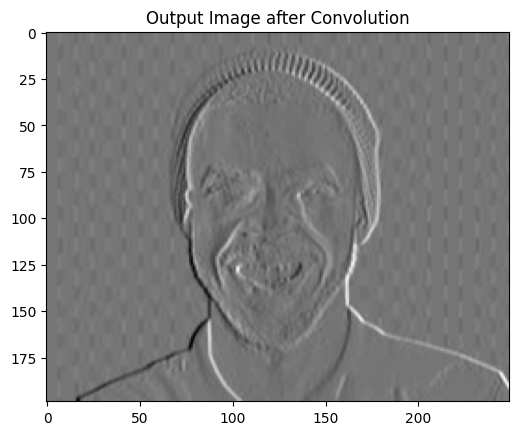

In [ ]:
# Step 6: Apply convolution layer operation and plot the output image
def convolution_layer(X, W, b):
    return convolve2d(X.squeeze(), W.squeeze(), mode='valid') + b
    #X.squeeze() used for to remove single dimensions
W = np.expand_dims(np.expand_dims(kernel, axis=-1), axis=-1)  # Add channel and batch dimensions to kernel
b = np.zeros((1, 1, 1, output_channels))
conv_output = convolution_layer(image.squeeze(), W.squeeze(), b.squeeze())
plt.imshow(conv_output, cmap='gray')
plt.title('Output Image after Convolution')
plt.show()

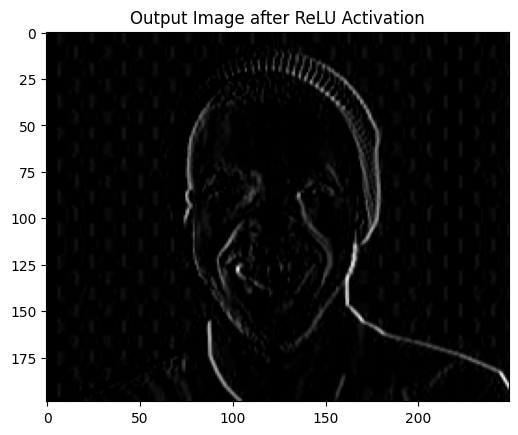

In [ ]:
# Step 7: Apply activation layer operation and plot the output image
def relu_activation(Z):
    return np.maximum(0, Z)
activation_output = relu_activation(conv_output)
plt.imshow(activation_output, cmap='gray')
plt.title('Output Image after ReLU Activation')
plt.show()

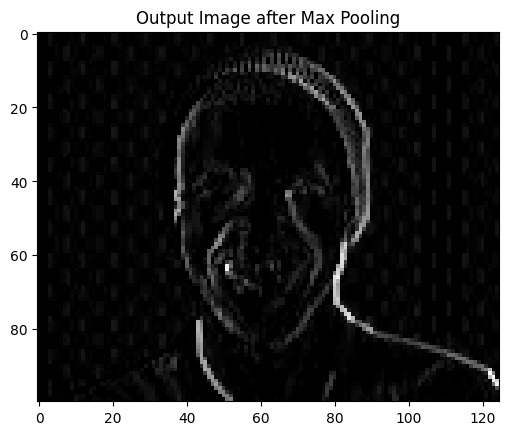

In [ ]:
# Step 8: Apply pooling layer operation and plot the output image
def max_pooling(X, pool_size):
    pool_output = np.zeros((X.shape[0] // pool_size[0] + 1, X.shape[1] // pool_size[1] + 1))  # Adjust output shape
    for i in range(0, X.shape[0], pool_size[0]):
        for j in range(0, X.shape[1], pool_size[1]):
            # Adjust pooling window to stay within bounds
            pool_window = X[i:min(i+pool_size[0], X.shape[0]), j:min(j+pool_size[1], X.shape[1])]
            pool_output[i // pool_size[0], j // pool_size[1]] = np.max(pool_window)
    return pool_output

pool_size = (2, 2)
pool_output = max_pooling(activation_output, pool_size)
plt.imshow(pool_output, cmap='gray')
plt.title('Output Image after Max Pooling')
plt.show()